**Importing libraries**

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


**Mounting the google drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Neural networks/AAPL.csv')

In [5]:
data.shape

(3853, 7)

In [6]:
data.tail

<bound method NDFrame.tail of             Date        Open        High  ...       Close   Adj Close    Volume
0     2009-12-01    1.502857    1.560714  ...    1.550714    1.034021  90384000
1     2009-12-02    1.542857    1.564286  ...    1.538571    1.025924  51324000
2     2009-12-03    1.538571    1.560000  ...    1.502143    1.001633  47824000
3     2009-12-04    1.495714    1.512143  ...    1.510714    1.007349  44485000
4     2009-12-05    1.492857    1.510714  ...    1.489286    0.993060  46544400
...          ...         ...         ...  ...         ...         ...       ...
3848  2020-06-14  185.800003  188.389999  ...  188.020004  188.020004  26219800
3849  2020-06-15  188.350006  188.990005  ...  186.529999  186.529999  31646400
3850  2020-06-16  186.229996  189.490005  ...  188.160004  188.160004  31035200
3851  2020-06-17  190.020004  196.330002  ...  195.089996  195.089996  51034200
3852  2020-06-18  195.339996  197.690002  ...  191.050003  191.050003  42359300

[3853 row

In [0]:
data1=data

### **Data visualization**

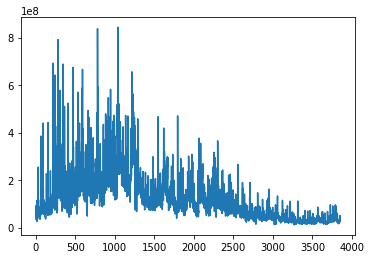

In [8]:
plt.plot('Volume', data=data)

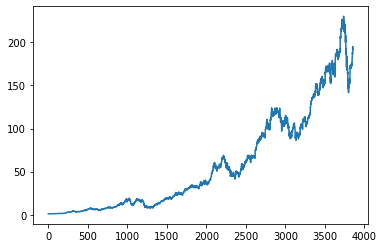

In [9]:
plt.plot('Adj Close', data=data)

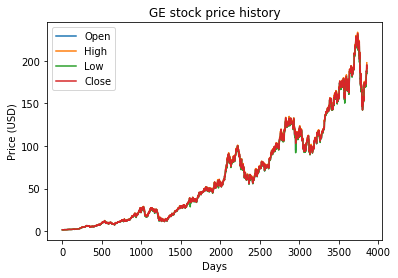

In [10]:
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
plt.plot(data["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

Predict the opening stock price of the data based on the opening stock prices for the past 60 days.

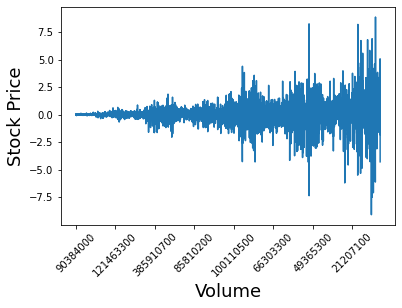

In [12]:
plt.plot(range(data1.shape[0]),(data1['Close']-data1['Open']))
plt.xticks(range(0,data1.shape[0],500),data1['Volume'].loc[::500],rotation=45)
plt.xlabel('Volume',fontsize=18)
plt.ylabel('Stock Price',fontsize=18)
plt.show()

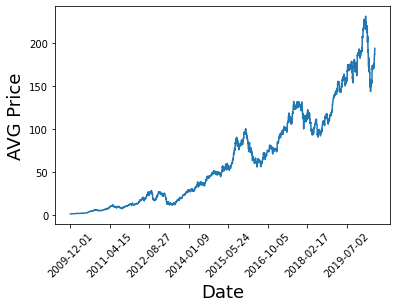

In [13]:
plt.plot(range(data1.shape[0]),(data1['Low']+data1['High'])/2.0)
plt.xticks(range(0,data1.shape[0],500),data1['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('AVG Price',fontsize=18)
plt.show()

### **Spliting train test data**

In [14]:
train_data = data[0:(len(data)-60)]
test_data = data[(len(data)-60):len(data)]
print(train_data.shape)
print(test_data.shape)

(3793, 7)
(60, 7)


In [15]:
train_data1 = train_data.iloc[:,1:2].values
train_data1.shape

(3793, 1)

### **Scaling the data**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_traindata = scaler.fit_transform(train_data1)

In [0]:
X_train = []
y_train = []
for i in range(1, len(scaled_traindata)):
    X_train.append(scaled_traindata[i-1:i, 0])
    y_train.append(scaled_traindata[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## **Model building**

Add 3 LSTM layer and a dense layer a last layer of the model

In [0]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### **Model fitting**

In [33]:
model.fit(X_train,y_train,epochs=80,batch_size=25)

Epoch 1/80
3792/3792 [==============================] - 3s 760us/step - loss: 0.0397
Epoch 2/80
3792/3792 [==============================] - 1s 242us/step - loss: 0.0022
Epoch 3/80
3792/3792 [==============================] - 1s 238us/step - loss: 0.0019
Epoch 4/80
3792/3792 [==============================] - 1s 239us/step - loss: 0.0015
Epoch 5/80
3792/3792 [==============================] - 1s 245us/step - loss: 0.0014
Epoch 6/80
3792/3792 [==============================] - 1s 236us/step - loss: 0.0013
Epoch 7/80
3792/3792 [==============================] - 1s 250us/step - loss: 0.0012
Epoch 8/80
3792/3792 [==============================] - 1s 245us/step - loss: 0.0013
Epoch 9/80
3792/3792 [==============================] - 1s 245us/step - loss: 0.0012
Epoch 10/80
3792/3792 [==============================] - 1s 248us/step - loss: 0.0011
Epoch 11/80
3792/3792 [==============================] - 1s 244us/step - loss: 0.0012
Epoch 12/80
3792/3792 [==============================] - 1s 249

In [34]:
y_test = test_data.iloc[:,1:2].values
total = data['Open']
test_input = total[len(total) - len(test_data) - 60:].values
total.shape

(3853,)

In [35]:
test_input.shape

(120,)

In [0]:
test_input = test_input.reshape(-1,1)
test_input = scaler.transform(test_input)

In [0]:
X_test = []
for i in range(60, len(test_input)):
    X_test.append(test_input[i-1:i,0])

In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### **Prediction**

In [0]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

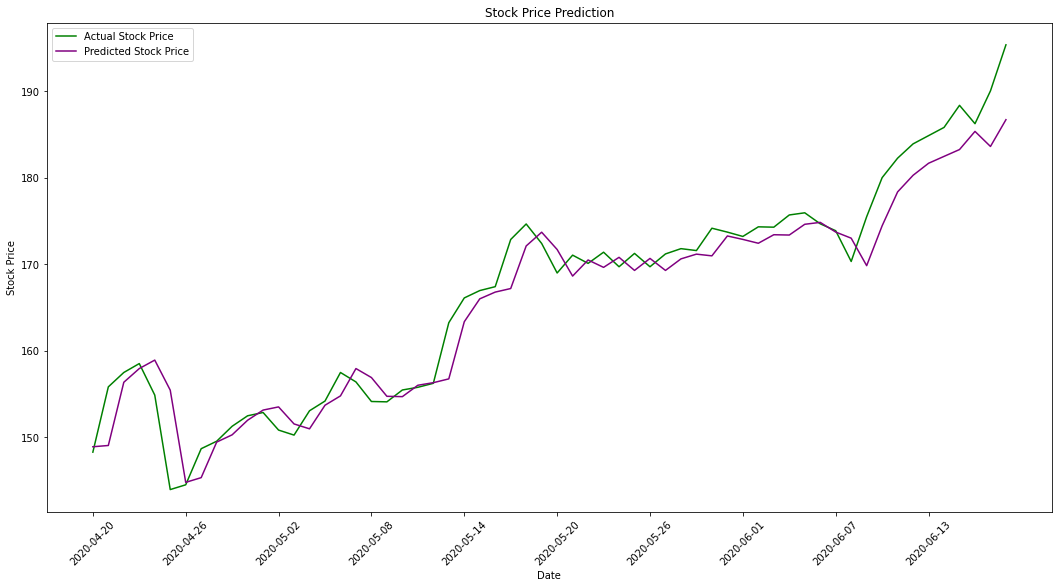

In [40]:
plt.figure(figsize = (18,9))
plt.plot(y_test, color='green', label='Actual Stock Price')
plt.plot(predictions , color='purple', label='Predicted Stock Price')
plt.xticks(range(0,test_data.shape[0],6),test_data['Date'].loc[::6],rotation=45)
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Inferences


*   The given dataset is the stock price and it was asked to predict the opening stock prices based on last 60 days data.
*   The first step was data visualization, wherein the graphs were plotted. It can be found that open/high/low and close values fluctuated but there was an overall increase in the price as the days went by.
*   MinMaxScaler class from the sklear.preprocessing library is used to scale the data between 0 and 1.  
*   In a time series problems, we have to predict a value at time T, based on the data from days T-N where N can be any number of steps. The feature set should contain the opening stock price values for the past 60 days while the label or dependent variable should be the stock price at the 61st day.
*  A LSTM model was created with 3 layers with the last dense layer. Dropout layer is added as 0.2 to avoid over-fitting
*   The model was compiled with Adam optimizer. As a part of hyper parameter tuning, different optimizers like SGD, RMSprop and Adagrad were tried. There was negligible difference in the loss when different optimizers were used. Since Adam is powerful and used in common I decided to go with this optimizer. It can be also observed that the computational times taken for each optimizer is almost the same and there was not much variation.
*   The number of epochs chosen was 80. When more than 100 epochs were tried, the model started to overfit the data. Hence the epochs were not increased beyond 80.
*   The batch size chosen 25, when this was increased the prediction was bad. The data was underfitting.
*  The ability of LSTM to remember previous information makes it ideal for tasks like predicting stock prices. From the price prediction graph, we can see that the predicted price is very close to the acutal data.












